In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
gas=pd.read_csv('gas_turbines.csv')
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gas=gas.iloc[:,[7,0,1,2]]

In [4]:
gas.shape

(15039, 4)

In [5]:
gas.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [6]:
gas.isnull().sum()

TEY    0
AT     0
AP     0
AH     0
dtype: int64

In [7]:
x=gas.iloc[:,1:5]
y=gas.iloc[:,0]

In [8]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [9]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
seed=7
np.random.seed(seed)

In [11]:
model=Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 4s 3ms/step - loss: -1430250.8750 - accuracy: 0.0000e+00 - val_loss: -5541928.5000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: -19189230.0000 - accuracy: 0.0000e+00 - val_loss: -37657132.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: -71004936.0000 - accuracy: 0.0000e+00 - val_loss: -107942040.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: -165146208.0000 - accuracy: 0.0000e+00 - val_loss: -222196176.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: -306723072.0000 - accuracy: 0.0000e+00 - val_loss: -385075456.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: -500588576.0000 - accuracy: 0.0000e+00 - val_loss: -601360192.0000 - val_ac

Epoch 48/150
1008/1008 [==============================] - 3s 3ms/step - loss: -121806864384.0000 - accuracy: 0.0000e+00 - val_loss: -122284638208.0000 - val_accuracy: 0.0000e+00
Epoch 49/150
1008/1008 [==============================] - 3s 3ms/step - loss: -128925024256.0000 - accuracy: 0.0000e+00 - val_loss: -129359282176.0000 - val_accuracy: 0.0000e+00
Epoch 50/150
1008/1008 [==============================] - 3s 3ms/step - loss: -136308867072.0000 - accuracy: 0.0000e+00 - val_loss: -136695668736.0000 - val_accuracy: 0.0000e+00
Epoch 51/150
1008/1008 [==============================] - 3s 3ms/step - loss: -143964782592.0000 - accuracy: 0.0000e+00 - val_loss: -144301178880.0000 - val_accuracy: 0.0000e+00
Epoch 52/150
1008/1008 [==============================] - 3s 3ms/step - loss: -151897718784.0000 - accuracy: 0.0000e+00 - val_loss: -152176787456.0000 - val_accuracy: 0.0000e+00
Epoch 53/150
1008/1008 [==============================] - 3s 3ms/step - loss: -160110297088.0000 - accuracy: 0

1008/1008 [==============================] - 4s 3ms/step - loss: -796801368064.0000 - accuracy: 0.0000e+00 - val_loss: -789232943104.0000 - val_accuracy: 0.0000e+00
Epoch 95/150
1008/1008 [==============================] - 3s 3ms/step - loss: -821053292544.0000 - accuracy: 0.0000e+00 - val_loss: -813123371008.0000 - val_accuracy: 0.0000e+00
Epoch 96/150
1008/1008 [==============================] - 3s 3ms/step - loss: -845783433216.0000 - accuracy: 0.0000e+00 - val_loss: -837497520128.0000 - val_accuracy: 0.0000e+00
Epoch 97/150
1008/1008 [==============================] - 3s 3ms/step - loss: -871006797824.0000 - accuracy: 0.0000e+00 - val_loss: -862353227776.0000 - val_accuracy: 0.0000e+00
Epoch 98/150
1008/1008 [==============================] - 3s 3ms/step - loss: -896731381760.0000 - accuracy: 0.0000e+00 - val_loss: -887690297344.0000 - val_accuracy: 0.0000e+00
Epoch 99/150
1008/1008 [==============================] - 4s 4ms/step - loss: -922944405504.0000 - accuracy: 0.0000e+00 - v

1008/1008 [==============================] - 3s 3ms/step - loss: -2431830720512.0000 - accuracy: 0.0000e+00 - val_loss: -2397403611136.0000 - val_accuracy: 0.0000e+00
Epoch 140/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2482397249536.0000 - accuracy: 0.0000e+00 - val_loss: -2447076229120.0000 - val_accuracy: 0.0000e+00
Epoch 141/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2533661868032.0000 - accuracy: 0.0000e+00 - val_loss: -2497426227200.0000 - val_accuracy: 0.0000e+00
Epoch 142/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2585603342336.0000 - accuracy: 0.0000e+00 - val_loss: -2548446527488.0000 - val_accuracy: 0.0000e+00
Epoch 143/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2638257061888.0000 - accuracy: 0.0000e+00 - val_loss: -2600170160128.0000 - val_accuracy: 0.0000e+00
Epoch 144/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2691614900224.0000 - accuracy

In [14]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: -3031500587008.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


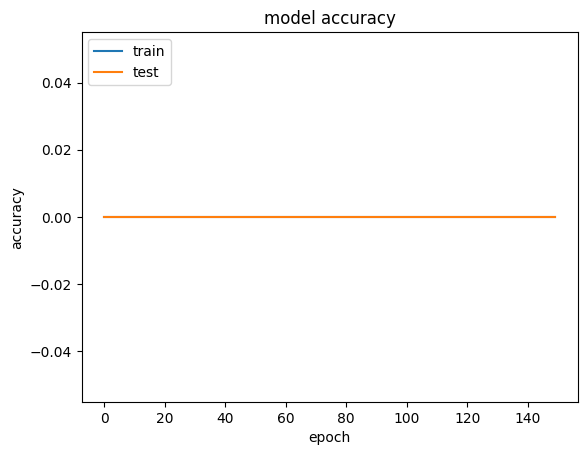

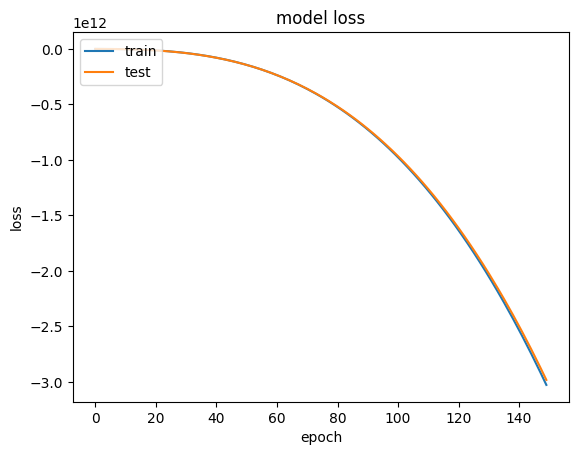

In [15]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
a=StandardScaler()
a.fit(x)
X_standardized=a.transform(x)

In [17]:
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [20]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev,param in zip(means,stds,params):
    print('{},{}with: {}'.format(mean,stdev,param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0with: {'batch_size': 10, 'epochs': 10}
0.0,0.0with: {'batch_size': 10, 'epochs': 50}
0.0,0.0with: {'batch_size': 10, 'epochs': 100}
0.0,0.0with: {'batch_size': 20, 'epochs': 10}
0.0,0.0with: {'batch_size': 20, 'epochs': 50}
0.0,0.0with: {'batch_size': 20, 'epochs': 100}
0.0,0.0with: {'batch_size': 40, 'epochs': 10}
0.0,0.0with: {'batch_size': 40, 'epochs': 50}
0.0,0.0with: {'batch_size': 40, 'epochs': 100}


In [21]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [22]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Define the grid search parametars
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters 
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
#build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\91832\AppData\Local\Temp\ipykernel_17132\200409313.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   6.1s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01......

In [23]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{}with:{}'.format(mean,stdev,param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0with:{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0with:{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0with:{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0with:{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0with:{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0with:{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0with:{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0with:{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0with:{'dropout_rate': 0.2, 'learning_rate': 0.1}


In [24]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [25]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\91832\AppData\Local\Temp\ipykernel_17132\2627903290.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   6.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  11.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  11.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   6.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=  11.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=  11.3s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 2/9] END .........n

In [26]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


In [27]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    adam = Adam(lr = 0.01)
    #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [28]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)
# Fitting the model
model.fit(X_standardized,y)
# Predicting using trained model
y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))

C:\Users\91832\AppData\Local\Temp\ipykernel_17132\2987446259.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


470/470 [==============================] - 1s 1ms/step
0.00013298756566261055
